Name: Sumanasekara W.K.G.G.

Index: 190610E

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

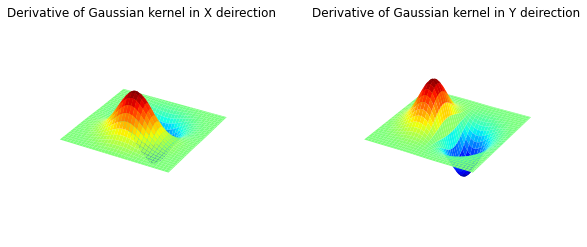

In [2]:
# Q1 - Derivatives of Gaussian filter

step, sigma = 0.1, 1.5

X, Y = np.arange(-5, 5+step, step), np.arange(-5, 5+step, step)
XX, YY = np.meshgrid(X, Y)
#gaussian = np.exp(-(XX**2 + YY**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
gaussian = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
gaussian /= np.sum(gaussian)

sobel_v = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)), dtype = np.float32)
g_x = cv.filter2D(gaussian, -1, sobel_v)

sobel_h = np.array(((-1, 0, 1), (-2, 0, 2), (-1, 0, 1)), dtype = np.float32)
g_y = cv.filter2D(gaussian, -1, sobel_h)

fig = plt.figure(figsize=plt.figaspect(0.4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(XX, YY, g_x, cmap=cm.jet)
ax.set_title("Derivative of Gaussian kernel in X deirection")
ax.axis("off")

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(XX, YY, g_y, cmap=cm.jet)
ax.set_title("Derivative of Gaussian kernel in Y deirection")
ax.axis("off")

plt.show()

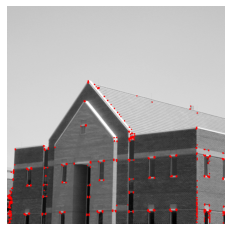

In [3]:
# Q2 - Harris corner detection

img = cv.imread(r"building.tif")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
corners = cv.cornerHarris(gray_img, 2, 3, 0.04)
corners = cv.dilate(corners, None)
img[corners > 0.01 * corners.max()]=[0, 0, 255]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

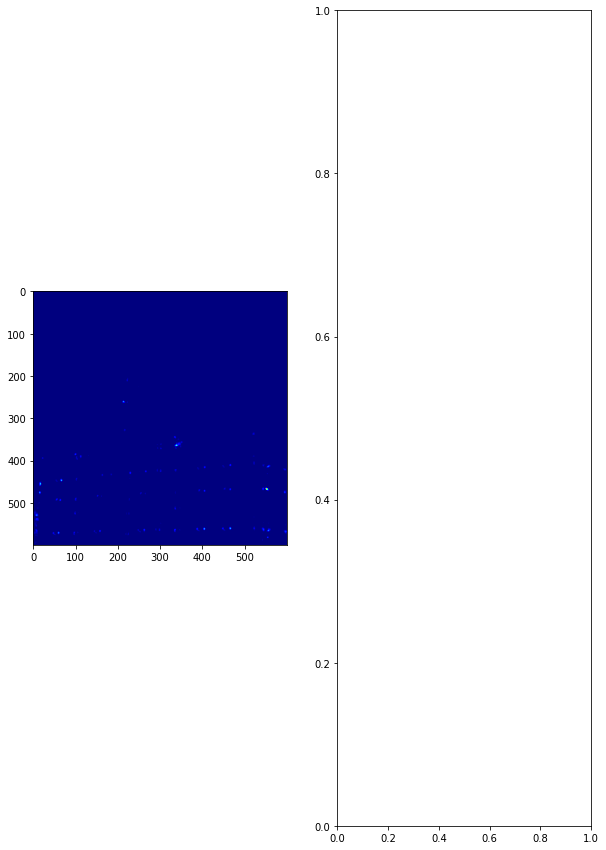

In [13]:
# Q3 - Harris manual

img = cv.imread(r"building.tif")
I = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)

sobel_v = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)), dtype = np.float32)
sobel_h = np.array(((-1, 0, 1), (-2, 0, 2), (-1, 0, 1)), dtype = np.float32)

I_x = cv.filter2D(I, -1, sobel_v)
I_y = cv.filter2D(I, -1, sobel_h)

sihma, ksize = 3, 7
m11 = cv.GaussianBlur(I_x*I_x, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(I_x*I_y, (ksize, ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(I_y*I_y, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2

R[R<1e8] = 0
fig, ax = plt.subplots(1, 2, figsize = (10, 15))
ax[0].imshow(R+127, cmap=cm.jet)


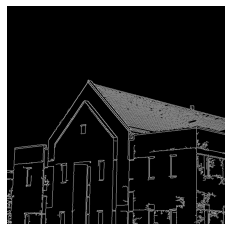

In [5]:
# Q4 - Canny edge detection

canny = cv.Canny(gray_img.astype(np.uint8), 50, 200)

plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()